In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read the data
cars = pd.read_csv("C:\\Users\\Neha Excelr\\DataSets\\Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [4]:
#check for missing values
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

# Correlation Matrix

In [5]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


We can see that Horsepower & Top speed are highly correlated variables, followed by Horsepower & MPG, & Top speed & miles per gallon.
Volume & weight of the car also show a very high correlation, 
& all the above correlations are also logically true.


# Scatterplot between variables along with histograms

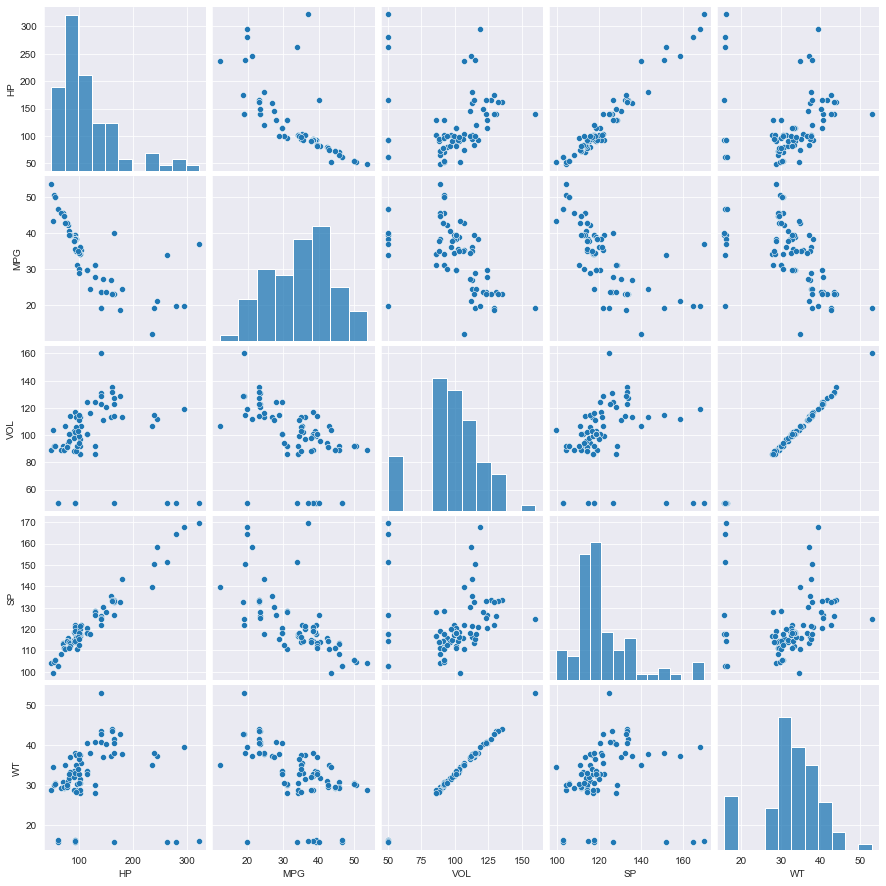

In [6]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(cars)

# Preparing a model

In [7]:
#Build model
#import statsmodels.formula.api as smf 
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()


In [8]:
#Predicted Values for MPG
model.fittedvalues

0     43.441935
1     42.388793
2     42.279341
3     42.538360
4     42.172648
        ...    
76    21.282096
77    17.899050
78    26.136453
79    12.316612
80    15.559481
Length: 81, dtype: float64

In [9]:
#Beta Coefficients
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [10]:
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [11]:
cars['Predictions_Manual']=30.677336+0.400574*cars['WT']-0.336051*cars['VOL']+0.395627*cars['SP']-0.205444*cars['HP']
cars['Predictions_Model']=model.fittedvalues
cars['Errors_Manual']=cars['MPG']-cars['Predictions_Manual']
cars['Errors_Model']=model.resid
cars

,HP,MPG,VOL,SP,WT,Predictions_Manual,Predictions_Model,Errors_Manual,Errors_Model
0,49,53.700681,89,104.185353,28.762059,43.441913,43.441935,10.258769,10.258747
1,55,50.013401,92,105.461264,30.466833,42.388768,42.388793,7.624633,7.624608
2,55,50.013401,92,105.461264,30.193597,42.279317,42.279341,7.734084,7.734060
3,70,45.696322,92,113.461264,30.632114,42.538332,42.538360,3.157991,3.157963
4,53,50.504232,92,104.461264,29.889149,42.172624,42.172648,8.331608,8.331584
...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,21.282008,21.282096,15.617992,15.617904
77,238,19.197888,115,150.576579,37.923113,17.898973,17.899050,1.298915,1.298838
78,263,34.000000,50,151.598513,15.769625,26.136381,26.136453,7.863619,7.863547
79,295,19.833733,119,167.944460,39.423099,12.316518,12.316612,7.517215,7.517122


# Beta Coefficient Interpretation

- Given a unit increase in the WT variable, the MPG variable will increase by 0.400574 since it is a positive Beta Coefficient for WT variable.

- Given a unit increase in the VOL variable, the MPG variable will decrease by 0.336051 since it is a negative Beta Coefficient for VOL variable.

- Given a unit increase in the SP variable, the MPG variable will increase by 0.395627 since it is a positive Beta Coefficient for SP variable.

- Given a unit increase in the HP variable, the MPG variable will decrease by 0.205444 since it is a negative Beta Coefficient for HP variable.

In [12]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


### Null Hypothesis - The independent variable is not at all significantly related to the dependent variable

### Alternate Hypothesis - The independent variable is significantly related to the dependent variable

For any variable, if p-value<0.05, then we can consider that variable to be useful/significant to predict the dependent variable.

In [13]:
model.pvalues

Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64

In [14]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.7705372737359844, 0.7584602881431415)

# Simple Linear Regression Models

In [15]:
ml_v=smf.ols('MPG~VOL',data = cars).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [16]:
ml_w=smf.ols('MPG~WT',data = cars).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [17]:
ml_wv=smf.ols('MPG~WT+VOL',data = cars).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues)  

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


# Calculating VIF (Variance Inflation Factor)

In [18]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared  
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared  
vif_wt = 1/(1-rsq_wt) 

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared  
vif_vol = 1/(1-rsq_vol) 

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared  
vif_sp = 1/(1-rsq_sp)

# Storing vif values in a data frame
d1 = {'Variables':['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

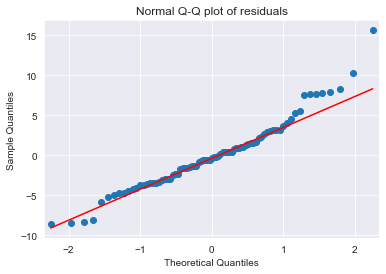

In [19]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [20]:
list(np.where(model.resid>10))

[array([ 0, 76], dtype=int64)]

<AxesSubplot:>

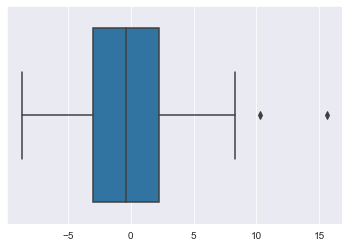

In [21]:
sns.boxplot(model.resid)

<AxesSubplot:xlabel='Errors_Model', ylabel='Count'>

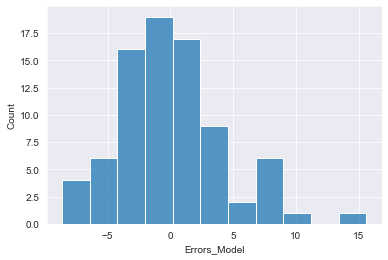

In [22]:
sns.histplot(cars["Errors_Model"])

<AxesSubplot:xlabel='Errors_Model', ylabel='Density'>

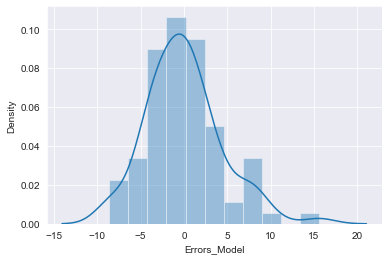

In [23]:
sns.distplot(cars['Errors_Model'])

## Residual Plot for Homoscedasticity

In [25]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

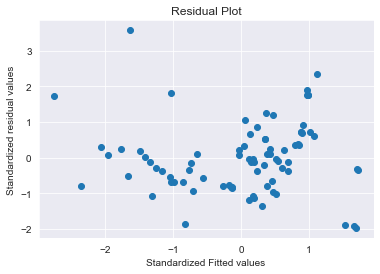

In [26]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [27]:
get_standardized_values(model.resid).mean()

5.208453695772339e-17

## Residual Vs Regressors

eval_env: 1


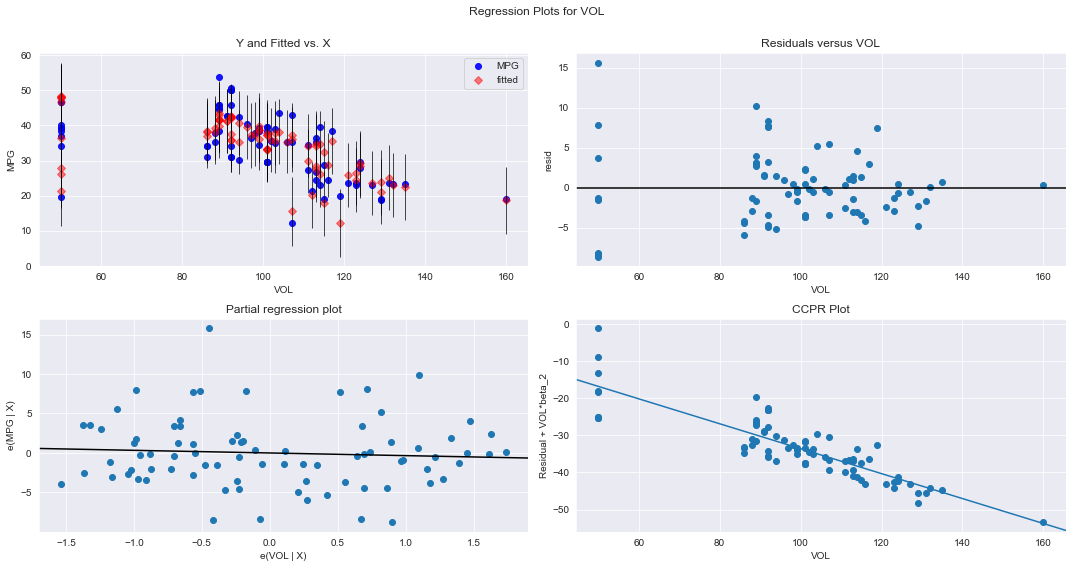

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "VOL", fig=fig)
plt.show()

eval_env: 1


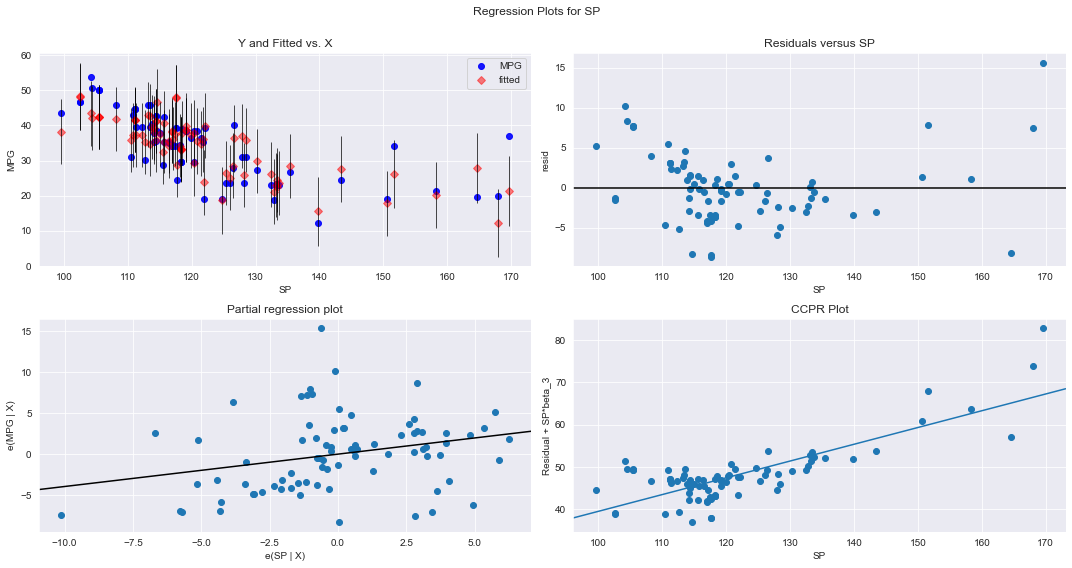

In [29]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "SP", fig=fig)
plt.show()

eval_env: 1


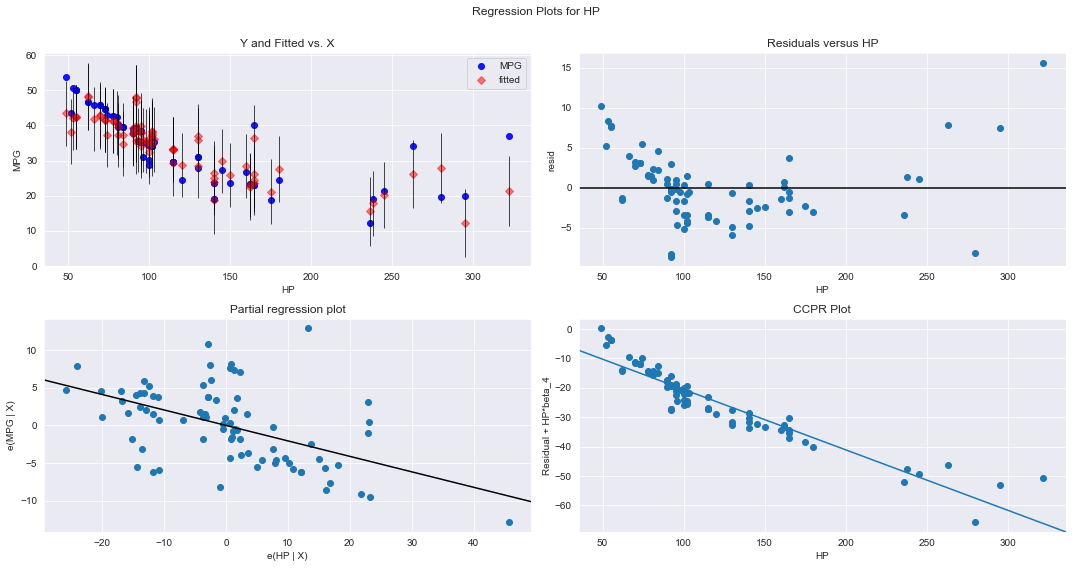

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


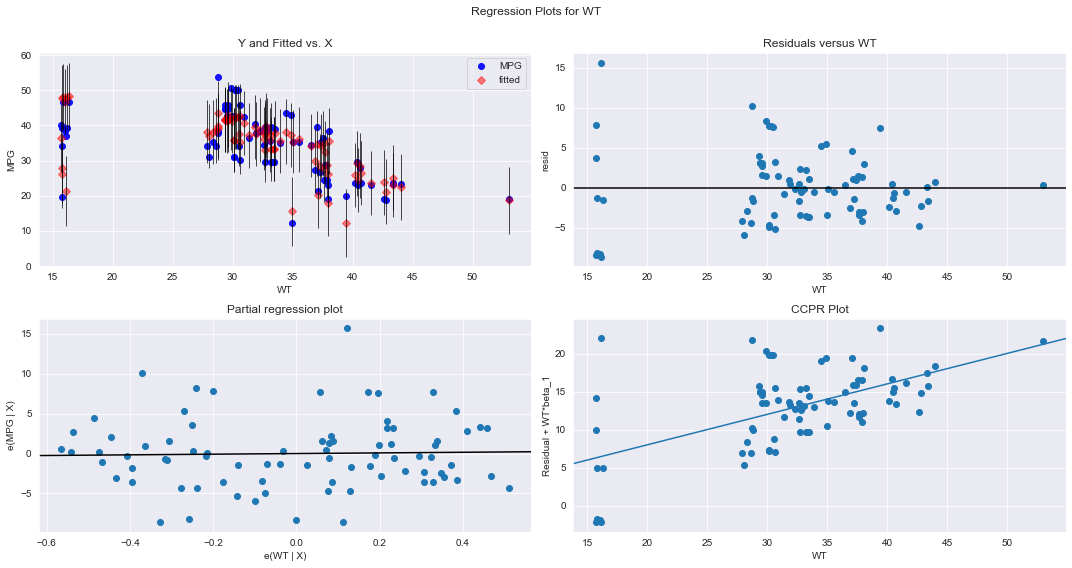

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "WT", fig=fig)
plt.show()

In [34]:
cars

,HP,MPG,VOL,SP,WT,Predictions_Manual,Predictions_Model,Errors_Manual,Errors_Model
0,49,53.700681,89,104.185353,28.762059,43.441913,43.441935,10.258769,10.258747
1,55,50.013401,92,105.461264,30.466833,42.388768,42.388793,7.624633,7.624608
2,55,50.013401,92,105.461264,30.193597,42.279317,42.279341,7.734084,7.734060
3,70,45.696322,92,113.461264,30.632114,42.538332,42.538360,3.157991,3.157963
4,53,50.504232,92,104.461264,29.889149,42.172624,42.172648,8.331608,8.331584
...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,21.282008,21.282096,15.617992,15.617904
77,238,19.197888,115,150.576579,37.923113,17.898973,17.899050,1.298915,1.298838
78,263,34.000000,50,151.598513,15.769625,26.136381,26.136453,7.863619,7.863547
79,295,19.833733,119,167.944460,39.423099,12.316518,12.316612,7.517215,7.517122


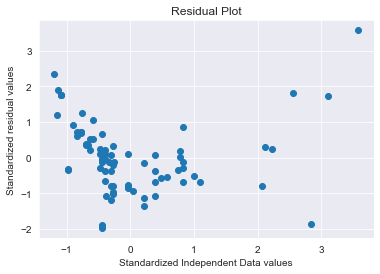

In [37]:
#HP
#VOL
#SP
#WT
#Predicted
#Errors

plt.scatter(get_standardized_values(cars['HP']),
            get_standardized_values(cars['Errors_Model']))

plt.title('Residual Plot')
plt.xlabel('Standardized Independent Data values')
plt.ylabel('Standardized residual values')
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [38]:
cars.shape

(81, 9)

In [39]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [40]:
c

array([6.04797739e-02, 2.80207825e-02, 1.84833331e-02, 7.27752720e-03,
       2.96019879e-02, 4.81278004e-03, 2.07405847e-02, 2.55586700e-03,
       4.05692942e-03, 7.54004910e-04, 2.97311924e-03, 8.72887201e-02,
       3.32487183e-04, 3.06716174e-03, 5.27414633e-03, 5.29293219e-03,
       1.16531605e-03, 7.63273362e-02, 6.47114749e-04, 5.79692771e-04,
       1.13359020e-05, 1.03054091e-02, 1.53244850e-04, 3.10730928e-04,
       1.49488694e-03, 5.85742198e-02, 1.00598054e-02, 6.55605611e-05,
       3.30438001e-02, 1.81295962e-04, 1.33814932e-02, 9.97753151e-04,
       4.02570308e-04, 1.13711936e-03, 2.85608656e-03, 4.41332141e-05,
       3.27632348e-04, 4.70959014e-03, 1.21704644e-02, 8.96948188e-03,
       2.35324656e-04, 9.75839299e-06, 4.49488700e-03, 4.48437031e-03,
       1.02593360e-05, 4.75617324e-04, 2.22586830e-05, 4.66305687e-05,
       1.27051048e-02, 5.33728062e-03, 2.98638028e-03, 5.00671925e-03,
       1.29659561e-04, 1.14393086e-02, 8.61438068e-04, 2.46695414e-04,
      

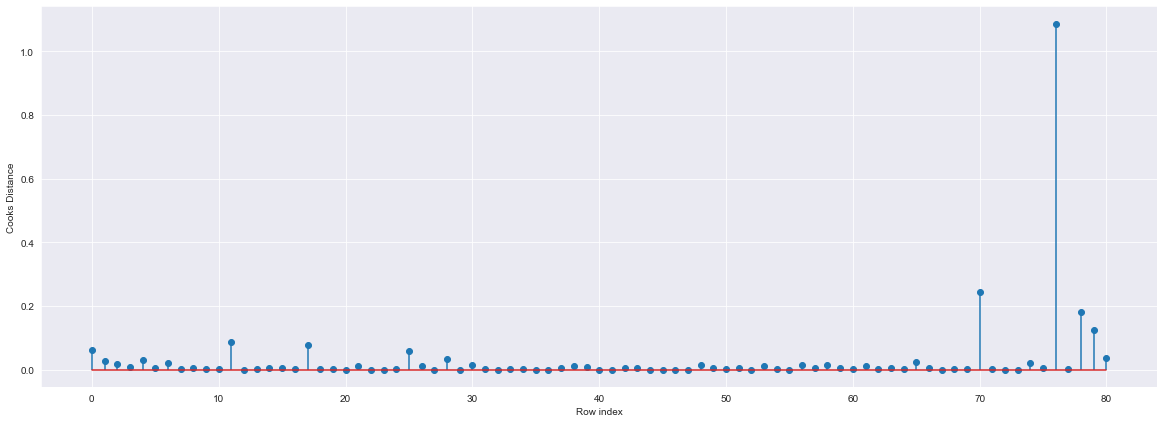

In [41]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(76, 1.0865193998179867)

## High Influence points

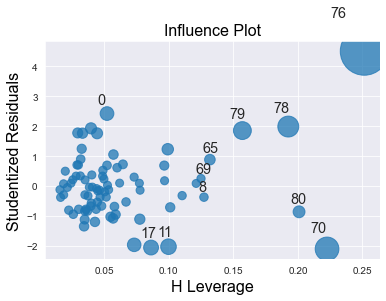

In [43]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
cars.shape

In [44]:
#k= number of variables (columns)
#n= number of observations (rows)
k = 4 
n = 81
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.18518518518518517

#### From the above plot, it is evident that data point 70 and 76 are the influencers

In [ ]:
cars[cars.index.isin([70, 76])]

In [ ]:
#See the differences in HP and other variable values
cars.head()

# Improving the model

In [ ]:
#Discard the data points which are influencers and reasign the row number (reset_index())
car1=cars.drop(cars.index[76],axis=0).reset_index()

In [ ]:
car1.shape

In [ ]:
#Drop the original index
car1=car1.drop(['index'],axis=1)

In [ ]:
car1

# Build Model

In [ ]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car1).fit()

In [ ]:
(final_ml_V.rsquared,final_ml_V.aic)

In [ ]:
((final_ml_V.resid)**2).mean()

In [ ]:
#Exclude variable "VOL" and generate R-Squared and AIC values
final_ml_W= smf.ols('MPG~WT+SP+HP',data = car1).fit()

In [ ]:
(final_ml_W.rsquared,final_ml_W.aic)

In [ ]:
((final_ml_W.resid)**2).mean()

##### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

# Cook’s Distance

In [ ]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

In [ ]:
#Drop 76 and 77 observations
car2=car1.drop(car1.index[[76,77]],axis=0)

In [ ]:
car2

In [ ]:
#Reset the index and re arrange the row values
car3=car2.reset_index()

In [ ]:
car4=car3.drop(['index'],axis=1)

In [ ]:
car4

In [ ]:
#Build the model on the new data
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()

In [ ]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

In [ ]:
#k= number of variables (columns)
#n= number of observations (rows)
k = 3 
n = 79
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [ ]:
#Check the accuracy of the mode
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()

In [ ]:
(final_ml_V.rsquared,final_ml_V.aic)

## Predicting for new data

In [ ]:
#New data for prediction
new_data=pd.DataFrame({'HP':40,"VOL":95,"SP":102,"WT":35},index=[1])

In [ ]:
new_data

In [ ]:
final_ml_V.predict(new_data)

In [ ]:
#final_ml_V.predict(cars_new.iloc[0:5,])

In [ ]:
#pred_y = final_ml_V.predict(cars_new)

In [ ]:
#pred_y

### On the Toyota cars Data Set given to you, please run a multiple linear regression, & find the following:

- Find the most significant 
- Independent variables that are 
- The correlation between fitted values & residuals
- Whether the residuals follow a normal distribution or not
- Also the VIF values for all independent variables
    